In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import pickle
import scipy.misc
import dlib

In [6]:
pwd

'/home/suraj18025/SML_Project/fer2013'

# For emotion (unbalanced data)

In [ ]:
# df = pd.read_csv('fer2013.csv')

In [ ]:
labels = df['emotion']
data = df['pixels']
data = np.array(data)
labels = np.array(labels)

In [ ]:
con_data = []
for i in range(len(data)):
  con_data.append([int(d)/255 for d in data[i].split(' ')])

In [ ]:
con_data = np.reshape(con_data, (len(con_data), 48, 48, 1))

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(con_data, labels, test_size=0.15, random_state=42)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [ ]:
def buildCovNet(classes):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(10, activation=tf.nn.relu))
  model.add(Dense(10, activation=tf.nn.relu))
#   model.add(Dropout(0.2))
  model.add(Dense(classes, activation=tf.nn.softmax))
  return model

In [ ]:
# def buildCovNet():
#   model = Sequential()
#   model.add(Conv2D(32, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(Conv2D(32, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(MaxPooling2D(pool_size=(2,2)))
#   model.add(Conv2D(64, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(Conv2D(64, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(MaxPooling2D(pool_size=(2,2)))
#   model.add(Conv2D(128, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(Conv2D(128, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(Conv2D(128, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
#   model.add(MaxPooling2D(pool_size=(2,2)))
# #   model.add(Conv2D(256, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
# #   model.add(Conv2D(256, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
# #   model.add(Conv2D(256, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
# #   model.add(MaxPooling2D(pool_size=(2,2)))  
# #   model.add(Conv2D(512, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
# #   model.add(Conv2D(512, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
# #   model.add(Conv2D(512, kernel_size=(3,3), data_format='channels_last', input_shape=(48,48,1)))
# #   model.add(MaxPooling2D(pool_size=(2,2)))  
#   model.add(Flatten())
#   model.add(Dense(4096, activation=tf.nn.relu))
#   model.add(Dense(4096, activation=tf.nn.relu))
#   model.add(Dense(1000, activation=tf.nn.relu))
# #   model.add(Dropout(0.2))
#   model.add(Dense(7, activation=tf.nn.softmax))
#   return model

In [ ]:
def trainNN(train_data, train_labels, test_data, model):
  model.fit(x=train_data, y=train_labels, epochs=10)
  pred_labels = model.predict_classes(test_data)
  return pred_labels

In [ ]:
def buildNCompile(classes):
  model = buildCovNet(classes)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = buildNCompile(7)
pred_labels = trainNN(train_data, train_labels, test_data, model)

In [ ]:
def calcAccuracy(test_labels, pred_labels):
    hit = 0
    for i in range(len(test_labels)):
        if test_labels[i] == pred_labels[i]:
            hit += 1
    return hit/len(test_labels)

In [ ]:
calcAccuracy(test_labels.tolist(), pred_labels.tolist())

# Emotion (balanced)

In [10]:
import dlib
from imutils import face_utils
import scipy.misc
import math

In [ ]:
with open('train_data_fer_6000perclass.txt', 'rb') as reader:
    train_data = pickle.load(reader)

In [ ]:
with open('train_label_fer_6000perclass.txt', 'rb') as reader:
    train_labels = pickle.load(reader)

In [11]:
df = pd.read_csv('fer2013.csv')

In [12]:
df1 = df['pixels'][:28709]

In [13]:
t_data = []
for i in df1:
    l = i.split(" ")
    t = [int(j) for j in l]
    t_data.append(t)
t_data = np.array(t_data)

In [30]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [37]:
train_label1 = list(df['emotion'][:28709])

In [14]:
t_data.shape

(28709, 2304)

In [15]:
import matplotlib.pyplot as plt

In [19]:
# img = np.array(train_data[200])
# ims = np.reshape(img, (48,48))
img = np.array(t_data[59])
ims = np.reshape(img, (48,48))

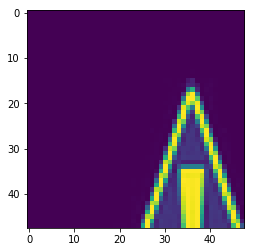

In [20]:
plt.imshow(ims)

In [21]:
# from google.colab.patches import cv2_imshow

In [22]:
def calcMeanDistance(x, y, mx, my):
    D = []
    for a, b in zip(x, y):
        d = math.sqrt((a-mx)**2 + (b-my)**2)
        D.append(d)
    return np.array(D)

In [23]:
def calcRotatedCoord(x_mc, y_mc):
    R = []
    for x, y in zip(x_mc, y_mc):
        r = (math.atan2(y, x)*360)/(2*math.pi)
        R.append(r)
    return np.array(R)

In [24]:
pwd

'/home/suraj18025/SML_Project/fer2013'

In [25]:
def extractLandmarks(img):
    detector = dlib.get_frontal_face_detector()
#     detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    imr = np.reshape(img, (48,48))
    ims = scipy.misc.toimage(imr)
    np_img = np.array(ims)
    rect = detector(np_img, 1)    # 2nd parameter => # of image pyramid layers to apply
    r = rect[0]
    shape = predictor(np_img, r)
    x_cord = []
    y_cord = []
    for k in range(68):
        x_cord.append(shape.part(k).x)
        y_cord.append(shape.part(k).y)
#         cv2.circle(np_img, (shape.part(k).x, shape.part(k).y), 1, (0,255,0), thickness=1)
#         resized_image = cv2.resize(np_img, (200, 200))
#         cv2_imshow(resized_image)
    x_cord = np.array(x_cord)
    y_cord = np.array(y_cord)
    x_mean = np.mean(x_cord)
    y_mean = np.mean(y_cord)
    x_mc = x_cord - x_mean
    y_mc = y_cord - y_mean
    D = calcMeanDistance(x_cord, y_cord, x_mean, y_mean)
    R = calcRotatedCoord(x_mc, y_mc)
    return x_cord, y_cord, D, R

In [27]:
all_lmarks_x = []
all_lmarks_y = []
all_D = []
all_R = []
n = 0
faulty = []
for img in t_data:

    try:
        x_cord, y_cord, D, R = extractLandmarks(np.array(img))
    #     print(x_cord)
    #     print(y_cord)
    #     print(D)
    #     print(R)
    #     break
        all_lmarks_x.append(x_cord)
        all_lmarks_y.append(y_cord)
        all_D.append(D)
        all_R.append(R)
    except:
        print(n)
        faulty.append(n)
    n += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


3
6
12
17
18
23
32
34
37
42
49
54
55
59
66
68
72
74
78
83
85
86
90
91
92
95
97
103
108
109
115
117
121
122
124
125
126
128
131
135
138
140
150
153
158
160
162
170
171
176
180
182
184
189
195
198
200
214
216
222
225
237
238
240
245
254
256
257
264
271
272
278
286
288
289
290
293
295
301
305
308
312
313
317
319
320
321
322
326
329
338
341
344
345
350
356
363
367
374
375
377
383
384
394
397
401
403
404
407
410
417
418
426
427
447
448
457
460
461
463
465
470
471
479
480
484
486
487
489
492
496
498
501
506
510
513
514
515
517
518
520
523
526
529
531
532
534
536
538
539
540
543
550
557
560
564
566
575
576
577
578
579
580
584
587
590
592
597
601
606
611
612
614
616
618
619
625
628
631
633
639
642
647
654
659
661
666
668
670
673
678
689
690
703
704
706
707
714
723
726
727
730
735
737
738
739
742
743
748
749
751
752
756
759
761
764
765
766
768
770
771
776
779
784
785
787
789
793
796
797
799
808
815
816
818
821
826
831
832
836
840
844
846
849
853
857
864
869
873
880
882
884
885
886
888
890
891
8

5705
5706
5709
5710
5711
5716
5718
5721
5722
5725
5726
5736
5742
5744
5745
5746
5747
5750
5751
5754
5759
5762
5768
5770
5774
5777
5778
5779
5785
5786
5787
5789
5791
5796
5798
5802
5808
5818
5822
5823
5825
5826
5832
5834
5837
5838
5839
5840
5843
5844
5845
5848
5857
5858
5862
5864
5869
5872
5873
5879
5881
5885
5888
5892
5894
5900
5903
5907
5908
5913
5916
5918
5919
5922
5928
5934
5935
5937
5939
5944
5948
5951
5964
5966
5967
5974
5975
5978
5979
5980
5981
5993
5994
5995
6000
6002
6003
6005
6006
6013
6020
6022
6023
6024
6025
6031
6035
6039
6042
6051
6054
6057
6064
6065
6068
6071
6078
6082
6086
6093
6102
6104
6107
6109
6112
6114
6115
6129
6132
6136
6137
6144
6145
6153
6154
6161
6162
6165
6170
6172
6173
6178
6179
6183
6185
6187
6193
6194
6200
6201
6202
6205
6208
6210
6216
6226
6227
6229
6232
6245
6248
6249
6254
6255
6257
6258
6260
6264
6267
6272
6279
6288
6291
6297
6298
6302
6304
6309
6310
6318
6319
6320
6324
6325
6327
6330
6338
6340
6341
6354
6358
6359
6364
6367
6369
6374
6385
6387
6389
6395


10833
10835
10837
10838
10843
10849
10851
10853
10855
10861
10869
10871
10878
10879
10881
10882
10883
10891
10892
10893
10896
10897
10901
10904
10910
10912
10913
10915
10917
10919
10922
10924
10925
10928
10930
10939
10942
10949
10951
10952
10953
10957
10962
10965
10969
10972
10979
10981
10985
10988
10996
10999
11000
11010
11016
11017
11024
11025
11026
11031
11037
11038
11045
11046
11049
11050
11052
11053
11062
11064
11065
11068
11072
11075
11078
11081
11083
11093
11095
11097
11098
11099
11101
11104
11105
11109
11113
11116
11117
11119
11128
11129
11134
11137
11140
11141
11145
11146
11147
11149
11152
11154
11156
11159
11165
11173
11175
11178
11182
11185
11186
11188
11189
11192
11200
11209
11210
11212
11220
11228
11232
11234
11235
11240
11243
11244
11249
11251
11260
11261
11262
11265
11272
11274
11279
11280
11282
11286
11289
11292
11293
11295
11301
11302
11305
11310
11311
11320
11321
11323
11327
11330
11335
11337
11340
11344
11345
11346
11354
11355
11356
11357
11358
11359
11362
11363
1136

15174
15179
15181
15187
15191
15198
15201
15204
15207
15208
15219
15220
15223
15228
15233
15234
15236
15239
15243
15244
15246
15249
15254
15264
15266
15271
15273
15275
15276
15279
15289
15297
15302
15306
15308
15312
15317
15323
15326
15327
15332
15333
15334
15335
15336
15340
15342
15343
15347
15348
15351
15352
15353
15355
15359
15361
15363
15365
15368
15373
15378
15379
15383
15389
15391
15394
15399
15405
15407
15408
15415
15416
15417
15425
15426
15430
15432
15439
15452
15453
15456
15457
15466
15469
15474
15485
15487
15488
15490
15504
15509
15514
15528
15529
15531
15546
15547
15553
15555
15559
15562
15564
15565
15568
15569
15570
15572
15574
15578
15588
15592
15593
15597
15598
15599
15600
15601
15603
15608
15611
15612
15613
15616
15620
15634
15637
15640
15642
15643
15646
15649
15651
15654
15655
15659
15668
15670
15672
15683
15687
15691
15693
15694
15695
15696
15698
15700
15703
15705
15706
15723
15725
15727
15734
15737
15740
15745
15751
15754
15759
15760
15762
15771
15776
15778
15779
1578

19741
19743
19746
19753
19754
19755
19762
19763
19764
19767
19769
19774
19778
19779
19785
19790
19793
19798
19800
19802
19804
19806
19808
19819
19820
19821
19826
19836
19838
19839
19842
19845
19848
19849
19855
19857
19858
19867
19872
19873
19876
19877
19879
19886
19887
19888
19891
19893
19899
19900
19901
19903
19906
19916
19917
19918
19921
19928
19931
19938
19941
19944
19948
19953
19959
19972
19973
19977
19982
19983
19984
19985
19988
19990
19995
19997
19999
20008
20011
20021
20022
20025
20031
20034
20038
20040
20043
20044
20045
20046
20047
20050
20053
20057
20058
20061
20063
20071
20074
20078
20081
20084
20086
20089
20093
20096
20098
20100
20103
20108
20109
20112
20113
20116
20118
20121
20130
20132
20133
20134
20135
20138
20149
20153
20167
20168
20169
20170
20171
20172
20173
20174
20175
20186
20187
20188
20192
20193
20196
20197
20202
20205
20208
20209
20210
20216
20220
20222
20224
20232
20238
20239
20240
20245
20248
20253
20255
20263
20264
20266
20268
20271
20272
20275
20278
20279
2028

24343
24345
24348
24349
24350
24352
24355
24359
24361
24363
24366
24368
24370
24374
24376
24377
24378
24389
24390
24393
24395
24396
24400
24404
24405
24407
24408
24409
24410
24412
24417
24419
24420
24421
24427
24430
24439
24441
24444
24445
24447
24452
24457
24463
24467
24469
24471
24473
24479
24481
24482
24484
24486
24487
24497
24500
24502
24507
24511
24514
24519
24520
24524
24527
24528
24534
24535
24539
24541
24547
24549
24550
24556
24568
24571
24577
24578
24579
24580
24581
24582
24593
24601
24610
24612
24615
24624
24629
24636
24640
24641
24643
24655
24662
24663
24664
24666
24671
24673
24678
24680
24681
24687
24688
24690
24691
24692
24693
24694
24698
24704
24705
24706
24709
24710
24712
24713
24715
24716
24717
24721
24724
24729
24731
24733
24734
24735
24736
24737
24739
24742
24744
24748
24760
24765
24766
24767
24780
24782
24784
24785
24790
24799
24800
24801
24808
24811
24812
24813
24817
24818
24822
24823
24828
24830
24831
24836
24837
24841
24842
24847
24849
24852
24854
24858
24861
2486

In [38]:
train_data=[]
train_label=[]
for (i,row) in enumerate(t_data):
    if i not in faulty:
        train_data.append(row)
        train_label.append(train_label1[i])
        

In [138]:
main_train_data=[]

In [139]:
 import copy


In [140]:
# # LBP features
# for i in range(len(all_R)):
#     main_train_data[i]+=all_R[i]
for i in range(len(all_D)):
    main_train_data.append(list(all_R[i])+list(all_D[i])+list(all_lmarks_y[i])+list(all_lmarks_x[i]))
# main_data_set=[]
# main_data_set
# main_data_set+=all_lmarks_x
# main_data_set+=all_lmarks_y
# main_data_set+=all_D
# main_data_set+=all_R

In [141]:
np.array((main_train_data)).shape

(20036, 272)

In [151]:
!nvidia-smi

Mon Apr 29 11:03:33 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:04:00.0 Off |                    0 |
| N/A   57C    P0    24W /  75W |   7604MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [148]:
# Cross Validation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import csv
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV

In [143]:
test_data=[]
X_train, X_test, y_train = np.array(main_train_data),np.array(test_data),np.array(train_label)

In [149]:
kf=KFold(n_splits=5)
model=[]
score_set1=[]
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    valid_train_data, valid_test_data = X_train[train_index], X_train[test_index]
    valid_train_label, valid_test_label = y_train[train_index], y_train[test_index]
    
    clf =LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial')
    clf.fit(np.array(valid_train_data),np.array(valid_train_label))

    b=clf.predict(np.array(valid_test_data))

    score1=clf.score(valid_test_data,valid_test_label)
    print("Accuracy ",score1)
    score_set1.append(score1)
    model.append(clf) 

TRAIN: [ 4008  4009  4010 ... 20033 20034 20035] TEST: [   0    1    2 ... 4005 4006 4007]
Accuracy  0.532185628742515
TRAIN: [    0     1     2 ... 20033 20034 20035] TEST: [4008 4009 4010 ... 8012 8013 8014]
Accuracy  0.5393062141252808
TRAIN: [    0     1     2 ... 20033 20034 20035] TEST: [ 8015  8016  8017 ... 12019 12020 12021]
Accuracy  0.5208385325680059
TRAIN: [    0     1     2 ... 20033 20034 20035] TEST: [12022 12023 12024 ... 16026 16027 16028]
Accuracy  0.5507861242825056
TRAIN: [    0     1     2 ... 16026 16027 16028] TEST: [16029 16030 16031 ... 20033 20034 20035]
Accuracy  0.5440479161467432


In [146]:
# #Dumping into train data and label.
with open("landmarks_detection.pkl", 'wb') as f:
    pickle.dump(main_train_data, f)
with open("faultyindex.pkl", 'wb') as f:
    pickle.dump(faulty, f)
with open("label_of landmarks_feature.pkl", 'wb') as f:
    pickle.dump(train_label, f)